# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:


#Set up api call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_key}&units={units}&q="

#Format printed list
print("Beginning Data Retrieval")
print("----------------------------")

#Create lists to hold reponse values
cloudiness = []
country = []     
date = []         
humidity = []     
lat = []       
lng = []         
max_temp = []     
wind_speed = []  
city_list = []

index_counter = 0
set_counter = 1

#Set Loop for the city list
print("Beginning Data Retrieval")
for city in cities:
    city_url = query_url +city.replace(' ', '+')
    response = requests.get(city_url)

    
    data = response.json()
    try:
        time.sleep(1)

        humidity.append(data['main']['humidity'])
        country.append(data['sys']['country'])      
        cloudiness.append(data['clouds']['all'])
        date.append(data['dt'])
        
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])    
        wind_speed.append(data['wind']['speed'])
   
        city_list.append(city)
        index_counter +=1
        if index_counter % 50 == 0: 
            set_counter += 1
        print("Found city "+ city + " index: " + str(index_counter) + " set: " + str(set_counter))
    except:
        print('City not found. Moving on...')
        
    
#Format printed list
print("Finished Data Retrieval")
print("----------------------------")

Found city ximei index: 64 set: 2
Found city kloulklubed index: 65 set: 2
Found city port alfred index: 66 set: 2
Found city alyangula index: 67 set: 2
Found city zeya index: 68 set: 2
Found city atar index: 69 set: 2
Found city mar del plata index: 70 set: 2
Found city victoria index: 71 set: 2
City not found. Moving on...
Found city qaanaaq index: 72 set: 2
Found city kargala index: 73 set: 2
Found city ust-maya index: 74 set: 2
Found city gulbarga index: 75 set: 2
City not found. Moving on...
Found city naze index: 76 set: 2
Found city geraldton index: 77 set: 2
Found city karratha index: 78 set: 2
Found city bengkulu index: 79 set: 2
Found city isangel index: 80 set: 2
Found city yerbogachen index: 81 set: 2
Found city hamilton index: 82 set: 2
Found city khatanga index: 83 set: 2
City not found. Moving on...
Found city valparaiso index: 84 set: 2
Found city springfield index: 85 set: 2
Found city chuy index: 86 set: 2
Found city saint-ambroise index: 87 set: 2
Found city avarua in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating a data frame from the data
cities_df = pd.DataFrame({"City": city_list,
"Cloudiness": cloudiness,
"Country": country,     
"Date": date,         
"Humidity" :humidity,     
"Latitude": lat,       
"Longitude": lng,         
"Max Temp": max_temp,     
"Wind Speed": wind_speed
})
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,thompson,75,CA,1624386608,36,55.7435,-97.8558,18.00,4.12
1,busselton,100,AU,1624386868,78,-33.6500,115.3333,8.94,3.94
2,taybad,0,IR,1624386869,17,34.7400,60.7756,27.71,9.32
3,carnarvon,0,AU,1624386870,55,-24.8667,113.6333,9.04,4.63
4,kapaa,75,US,1624386872,80,22.0752,-159.3190,26.99,0.45


In [6]:
#Creating the description of the data
cities_df.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,55.532847,1.624387e+09,69.151460,20.307489,17.484647,20.278467,3.284763
std,39.863763,2.356940e+02,20.698251,33.535711,86.924658,7.819547,2.319055
min,0.000000,1.624387e+09,6.000000,-54.800000,-175.200000,-0.200000,0.000000
25%,12.000000,1.624387e+09,57.000000,-8.026950,-56.341175,14.910000,1.587500
50%,67.500000,1.624387e+09,73.000000,24.416200,20.592300,20.830000,2.745000
75%,99.000000,1.624387e+09,85.000000,49.720050,94.530575,26.060000,4.485000
max,100.000000,1.624388e+09,100.000000,78.218600,179.316700,41.880000,14.240000


In [7]:
cities_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_clean = cities_df.loc[cities_df["Humidity"]>100]
len(humidity_clean)

0

In [9]:
#  Get the indices of cities that have humidity over 100%.
# No cities with over 100% humidity

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

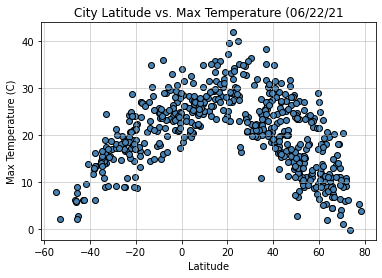

In [11]:
#Create Latitude vs. Temperature scatter plot
plt.scatter(cities_df["Latitude"], cities_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#Set title and labels
plt.title("City Latitude vs. Max Temperature (06/22/21")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

#Add grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

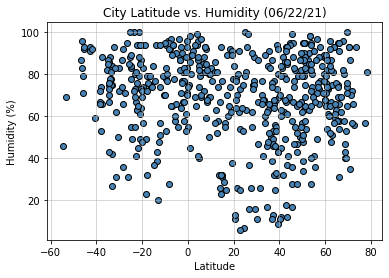

In [12]:

# Create Latitude vs. Humidity scatter plot
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Humidity (06/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

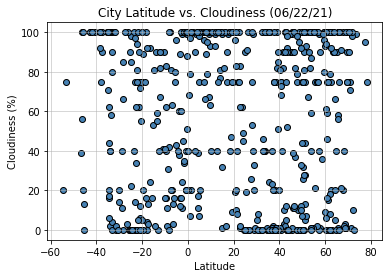

In [13]:
# Create Latitude vs. Cloudiness scatter plot
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness (06/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

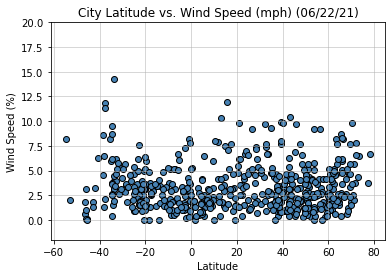

In [14]:

# Create Latitude vs. Wind Speed scatter plot
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#Set title and labels
plt.title("City Latitude vs. Wind Speed (mph) (06/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,20)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Create dataframes for northern and southern hemispheres
northern_df = cities_df.loc[cities_df["Latitude"]>=0]
southern_df = cities_df.loc[cities_df["Latitude"]<0]

In [16]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round((x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : 0      55.74
2      34.74
4      22.08
10     51.31
11     42.85
       ...  
542     1.03
543    58.96
544     7.71
546    37.73
547     1.17
Name: Latitude, Length: 371, dtype: float64


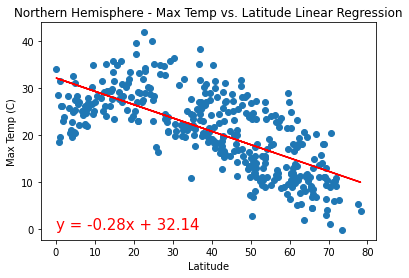

In [17]:
# Call an function #1
equation = linear_regression(northern_df["Latitude"], northern_df["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 1     -33.65
3     -24.87
5     -53.15
6      -6.98
7     -23.12
       ...  
530   -15.86
533   -23.13
538   -12.04
541   -17.71
545   -45.87
Name: Latitude, Length: 177, dtype: float64


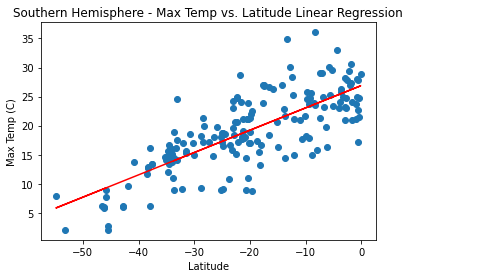

In [18]:
# Call an function #1
equation = linear_regression(southern_df["Latitude"], southern_df["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0      55.74
2      34.74
4      22.08
10     51.31
11     42.85
       ...  
542     1.03
543    58.96
544     7.71
546    37.73
547     1.17
Name: Latitude, Length: 371, dtype: float64


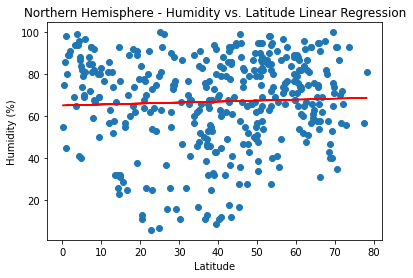

In [19]:
# Call an function #1
equation = linear_regression(northern_df["Latitude"], northern_df["Humidity"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 1     -33.65
3     -24.87
5     -53.15
6      -6.98
7     -23.12
       ...  
530   -15.86
533   -23.13
538   -12.04
541   -17.71
545   -45.87
Name: Latitude, Length: 177, dtype: float64


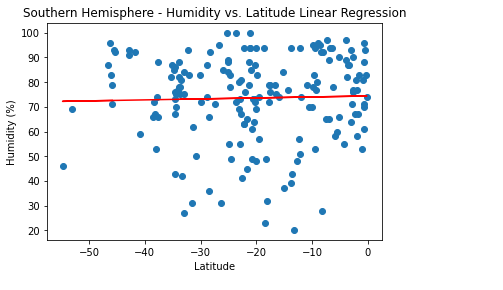

In [20]:
# Call an function #1
equation = linear_regression(southern_df["Latitude"], southern_df["Humidity"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0      55.74
2      34.74
4      22.08
10     51.31
11     42.85
       ...  
542     1.03
543    58.96
544     7.71
546    37.73
547     1.17
Name: Latitude, Length: 371, dtype: float64


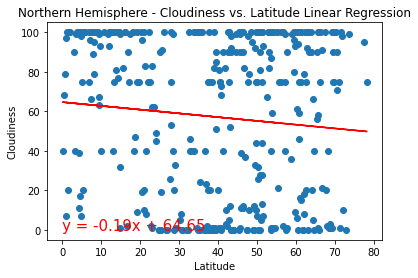

In [21]:
# Call an function #1
equation = linear_regression(northern_df["Latitude"], northern_df["Cloudiness"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 1     -33.65
3     -24.87
5     -53.15
6      -6.98
7     -23.12
       ...  
530   -15.86
533   -23.13
538   -12.04
541   -17.71
545   -45.87
Name: Latitude, Length: 177, dtype: float64


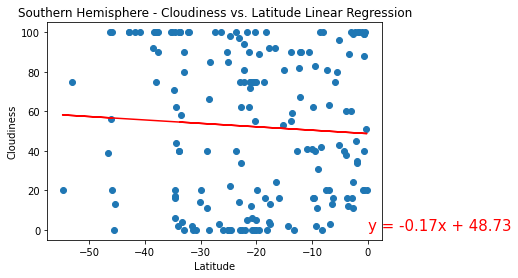

In [22]:
# Call an function #1
equation = linear_regression(southern_df["Latitude"], southern_df["Cloudiness"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0      55.74
2      34.74
4      22.08
10     51.31
11     42.85
       ...  
542     1.03
543    58.96
544     7.71
546    37.73
547     1.17
Name: Latitude, Length: 371, dtype: float64


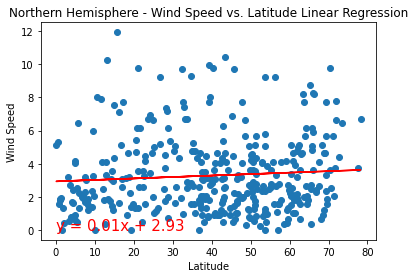

In [23]:
# Call an function #1
equation = linear_regression(northern_df["Latitude"], northern_df["Wind Speed"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 1     -33.65
3     -24.87
5     -53.15
6      -6.98
7     -23.12
       ...  
530   -15.86
533   -23.13
538   -12.04
541   -17.71
545   -45.87
Name: Latitude, Length: 177, dtype: float64


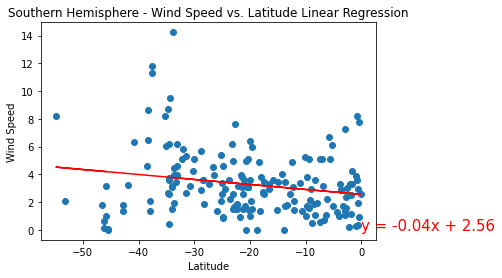

In [24]:
# Call an function #1
equation = linear_regression(southern_df["Latitude"], southern_df["Wind Speed"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")